In [1]:
#Prepare a classification model using Naive Bayes for salary data

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB
import seaborn as snb

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 
import matplotlib.pyplot as plt

In [14]:
test = pd.read_csv("C:\\Users\\deepa\\Downloads\\SalaryData_Test.csv")
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [15]:
train = pd.read_csv("C:\\Users\\deepa\\Downloads\\SalaryData_Train.csv")
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [17]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [18]:
#Coverting the catergorical features into numerical features through Label encoding, for train data
train = train.apply(LabelEncoder().fit_transform)
train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [19]:
test = test.apply(LabelEncoder().fit_transform)
test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


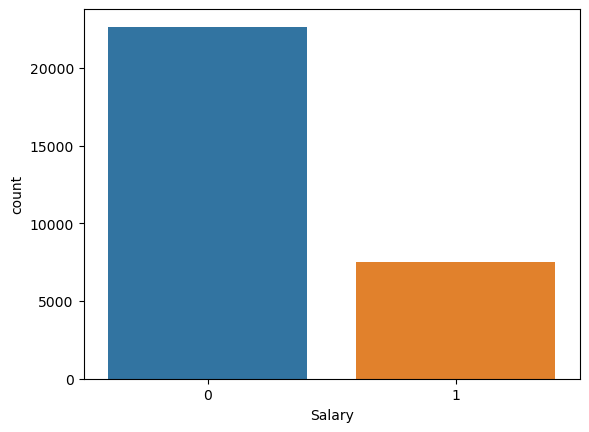

0    22653
1     7508
Name: Salary, dtype: int64

In [20]:
snb.countplot(x='Salary',data= train)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
train['Salary'].value_counts()

In [11]:
#Extracting the independent and dependent variables from the dataset in the train dataset
X_train= train.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_train= train['Salary'].values
print(np.unique(Y_train))
X_train

[0 1]


array([[22,  5, 12, ...,  0, 39,  0],
       [33,  4, 12, ...,  0, 12,  0],
       [21,  2,  8, ...,  0, 39,  0],
       ...,
       [41,  2,  8, ...,  0, 39,  0],
       [ 5,  2,  8, ...,  0, 19,  0],
       [35,  3,  8, ...,  0, 39,  1]], dtype=int64)

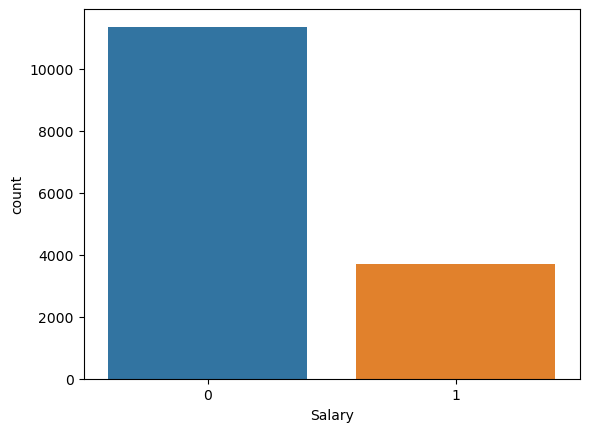

0    11360
1     3700
Name: Salary, dtype: int64

In [21]:
snb.countplot(x='Salary',data= test)
plt.xlabel('Salary')
plt.ylabel('count')
plt.show()
test['Salary'].value_counts()

<Axes: xlabel='occupation', ylabel='workclass'>

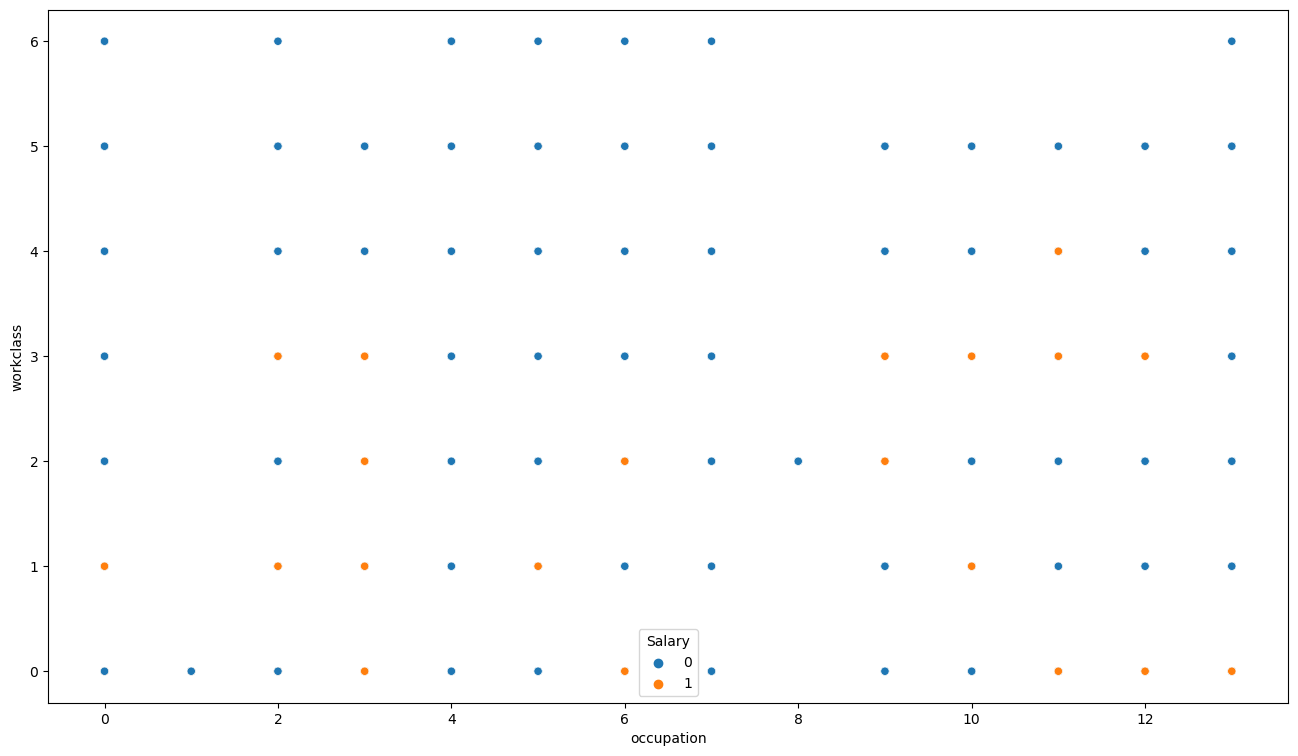

In [23]:
plt.figure(figsize=(16, 9))
snb.scatterplot(data=train, x='occupation', y='workclass', hue='Salary')

<Axes: xlabel='education'>

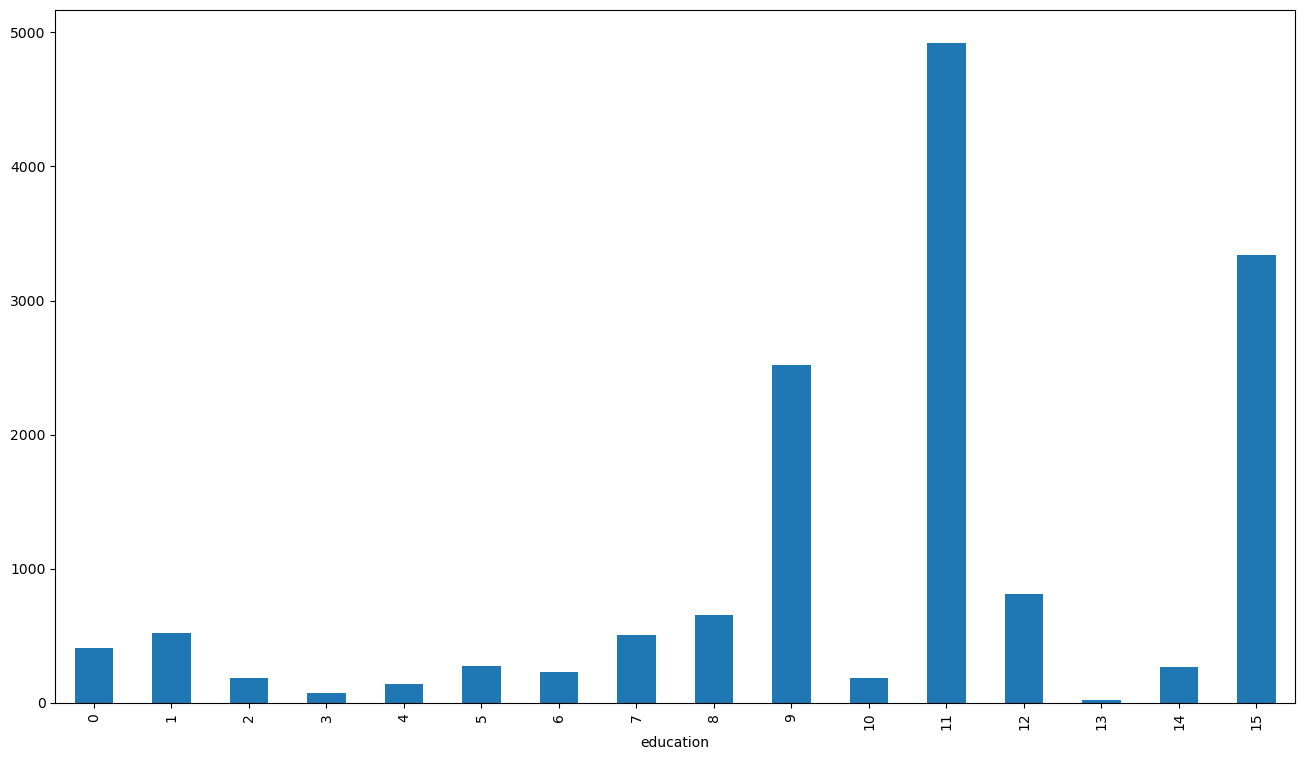

In [24]:
plt.figure(figsize=(16, 9))
pd.crosstab(train['Salary'],train['education']).mean().plot(kind='bar')

<Axes: xlabel='sex'>

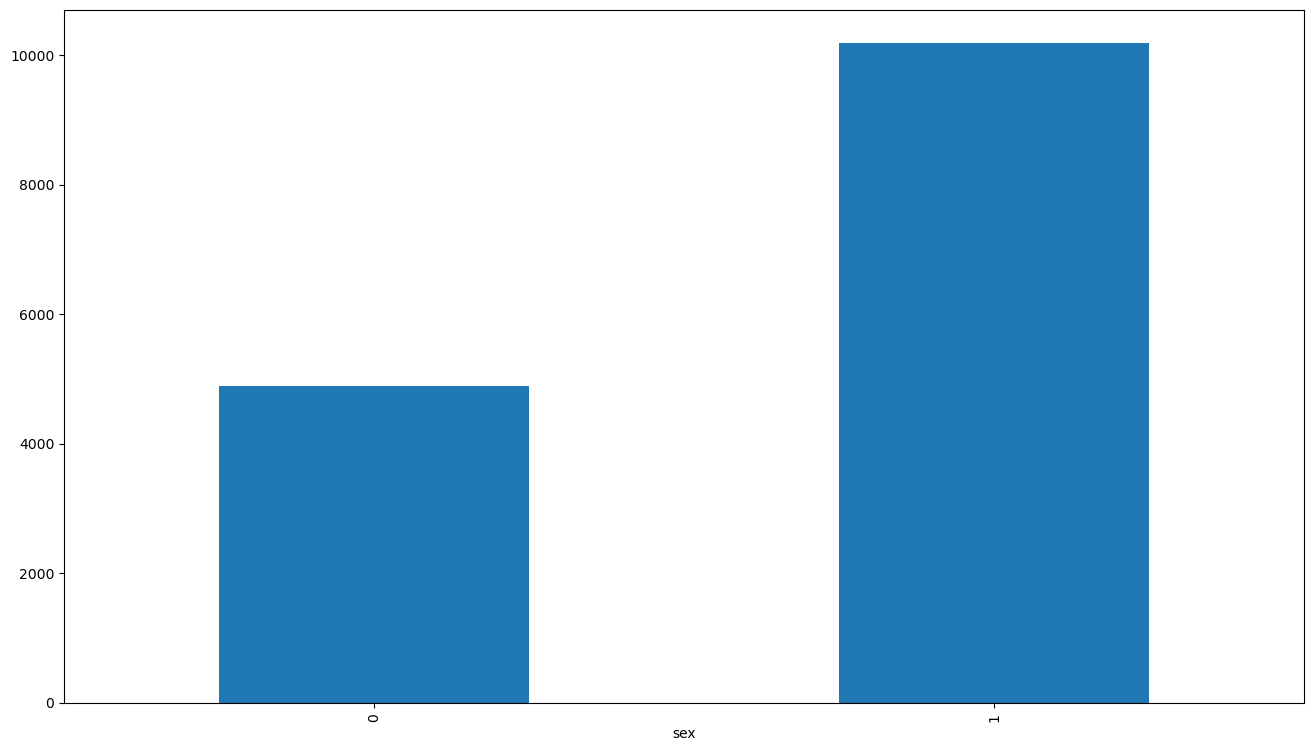

In [25]:
plt.figure(figsize=(16, 9))
pd.crosstab(train['Salary'],train['sex']).mean().plot(kind='bar')

<Axes: xlabel='relationship'>

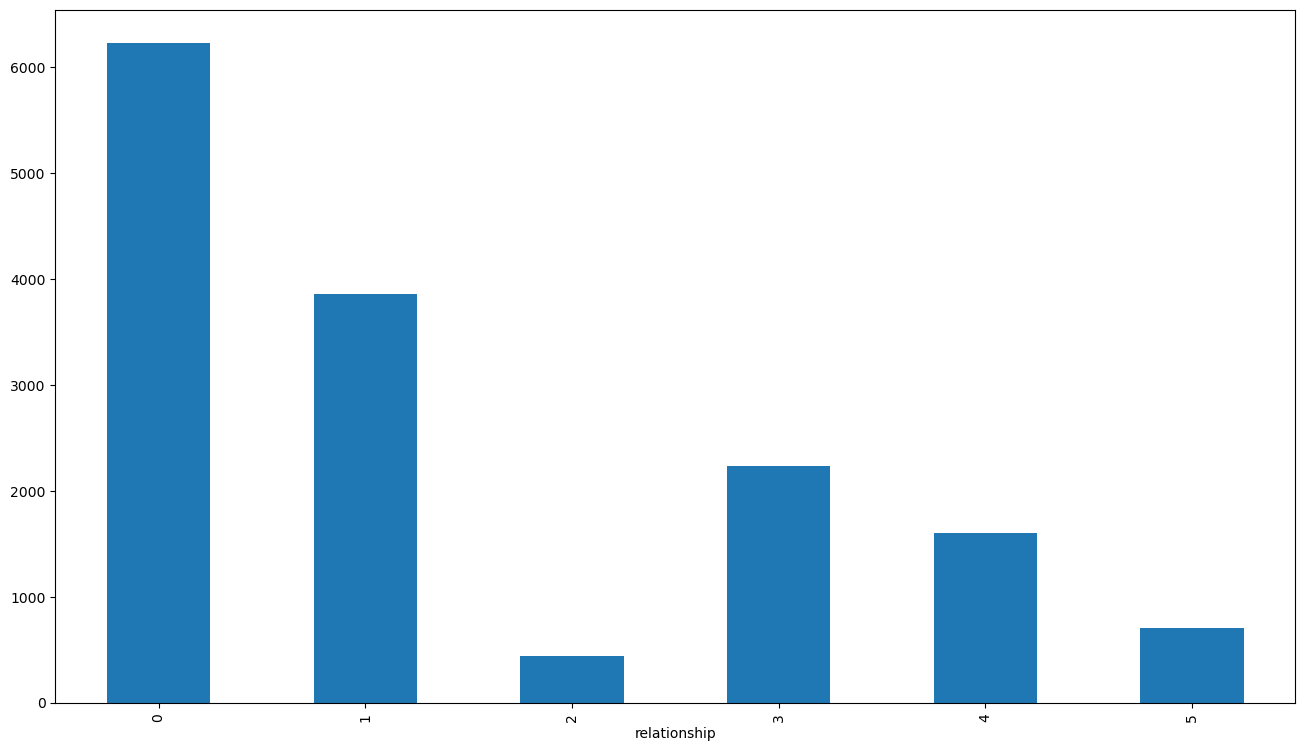

In [26]:
plt.figure(figsize=(16, 9))
pd.crosstab(train['Salary'],train['relationship']).mean().plot(kind='bar')

In [12]:
#Extracting the independent and dependent variables from the dataset in the test dataset
X_test= test.drop(['education','relationship','native','maritalstatus','sex','race'],axis=1).values
Y_test= test['Salary'].values
print(np.unique(Y_test))
X_test

[0 1]


array([[ 8,  2,  6, ...,  0, 39,  0],
       [21,  2,  8, ...,  0, 49,  0],
       [11,  1, 11, ...,  0, 39,  1],
       ...,
       [21,  2, 12, ...,  0, 49,  0],
       [27,  2, 12, ...,  0, 39,  0],
       [18,  3, 12, ...,  0, 59,  1]], dtype=int64)

In [13]:
#Constructing a Gaussian Naive bayes model and fitting on the train data
gnb = GB() 
gnb.fit(X_train, Y_train) 

GaussianNB()

In [14]:
#Accuracy score on the train dataset
gnb.score(X_train, Y_train)

1.0

In [15]:
#Making predictions on the testing data set
y_pred = gnb.predict(X_test) 
accuracy_test = np.mean(y_pred== Y_test)
accuracy_test

1.0

In [16]:
#Comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 100.0


In [17]:
#Constructing a Multinomial Naive Bayes and test the accuracy of the train dataset
classifier_mb = MB()
classifier_mb.fit(X_train, Y_train)
classifier_mb.score(X_train, Y_train)
classifier_mb.score(X_test, Y_test)
predicted_result = classifier_mb.predict(X_train)
accuracy_train = np.mean(predicted_result == Y_train)
accuracy_train

0.7800802360664434

In [18]:
#Testing accuracy of the model on the test dataset
test_predict=classifier_mb.predict(X_test)
accuracy_test_1 = np.mean(test_predict== Y_test)
accuracy_test_1

0.7820053120849934

In [19]:
#Consolidating
t={'model':['Gaussian NB','Multinomial NB'],
  'accuracy':[accuracy_test,accuracy_test_1]
  }
t=pd.DataFrame(t)
t

,model,accuracy
0,Gaussian NB,1.000000
1,Multinomial NB,0.782005


In [21]:
#From the above models, it is clear that the Gaussian naive bayes model gives a higher accuracy in classifying
#the salary data